# Issuance Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an issuance sweep run that compares two parameter sets. 

## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../../')


import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import holoviews as hv
import hvplot.pandas
hvplot.extension('plotly')

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Load Simulation Data

In [2]:
sim_df = pd.read_pickle("../data/simulations/issuance_sweep-2024-01-02_12-27-12.pkl.gz")

In [3]:
sim_df.head()

,days_passed,blocks_passed,circulating_supply,user_supply,issued_supply,total_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,...,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,block_time_in_seconds,max_credit_supply
0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,1.320000e+09,...,1,0,NaN,NaN,NaN,default-issuance-function,standard,1,6,3000000000
14,1,14400.0,13.698630,13.698630,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,1,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000
28,2,28800.0,27.363014,27.363014,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,2,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000
42,3,43200.0,41.319709,41.319777,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,3,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000
56,4,57600.0,55.718919,55.719222,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,4,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000


In [4]:
sim_df.groupby(['run', 'label', 'environmental_label']).size().reset_index(name='Counts')

,run,label,environmental_label,Counts
0,1,default-issuance-function,standard,1097
1,2,mock-issuance-function,standard,1097
2,3,mock-issuance-function-2,standard,1097


In [5]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

In [6]:
sim_df['block_reward'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,1096.0,1.592718e+01,1.159928e+01,0.000000,0.000000,20.738251,27.164690,2.739725e+01
mock-issuance-function,1096.0,1.204360e+06,2.558190e+06,219.337059,3435.433926,53808.199084,842776.799904,1.320000e+07
mock-issuance-function-2,1096.0,1.204380e+06,3.987206e+07,0.000000,0.000000,0.000000,0.000000,1.320000e+09


In [7]:
sim_df['block_utilization'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,1097.0,0.000002,5.460130e-08,0.0,0.000002,0.000002,0.000002,0.000002
mock-issuance-function,1097.0,0.000002,5.460130e-08,0.0,0.000002,0.000002,0.000002,0.000002
mock-issuance-function-2,1097.0,0.000002,5.460130e-08,0.0,0.000002,0.000002,0.000002,0.000002


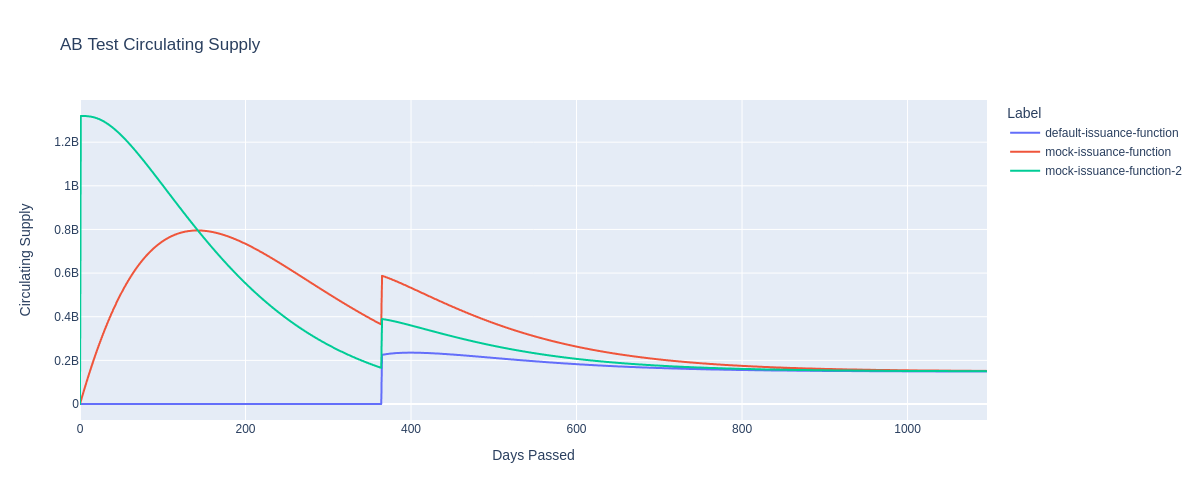

In [8]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values('days_passed'),
    y="circulating_supply",
    title="AB Test Circulating Supply",
    color=sim_df.index.get_level_values('label'),
    labels={
        "circulating_supply": "Circulating Supply",
        "x": "Days Passed",
        "color": "Label"
    }
)
fig.update_layout(width=1200, height=500)
fig.show()

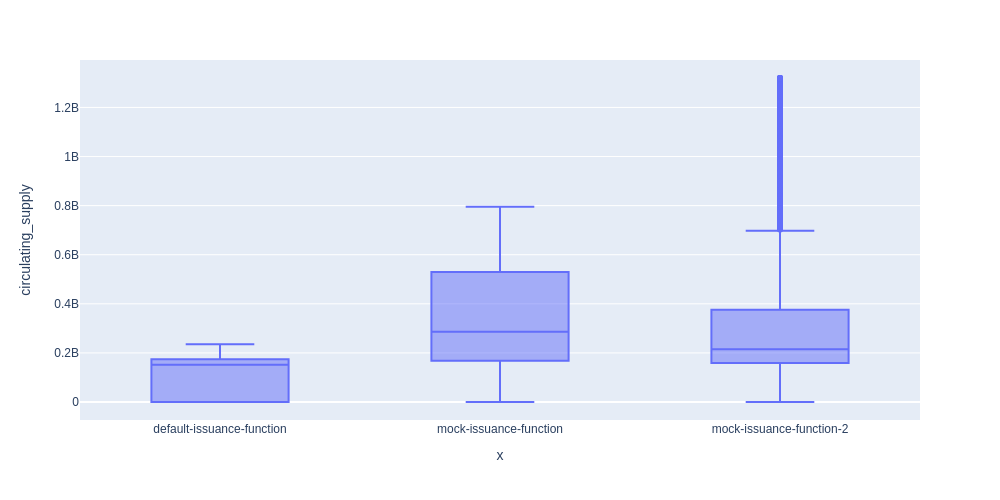

In [9]:
# box plot
fig = px.box(
    sim_df,
    x=sim_df.index.get_level_values('label'),
    y="circulating_supply",)
fig.update_layout(width=1000, height=500)
fig.show()

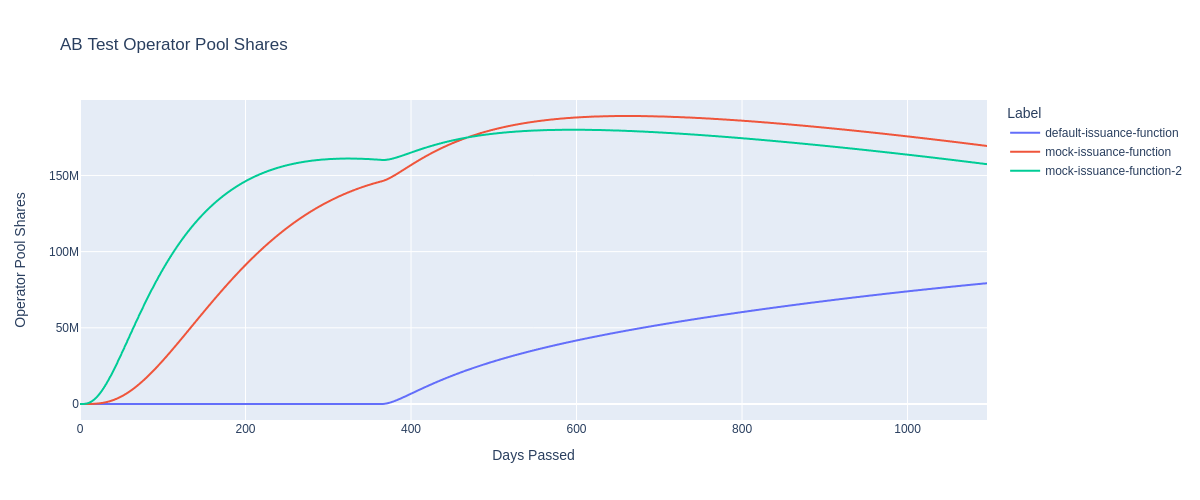

In [10]:
# sns.lineplot(sim_df, x="days_passed", y="operator_pool_shares", hue="label").set(
#     title="AB Test Operator Pool Shares"
# )
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="operator_pool_shares",
    title="AB Test Operator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "operator_pool_shares": "Operator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

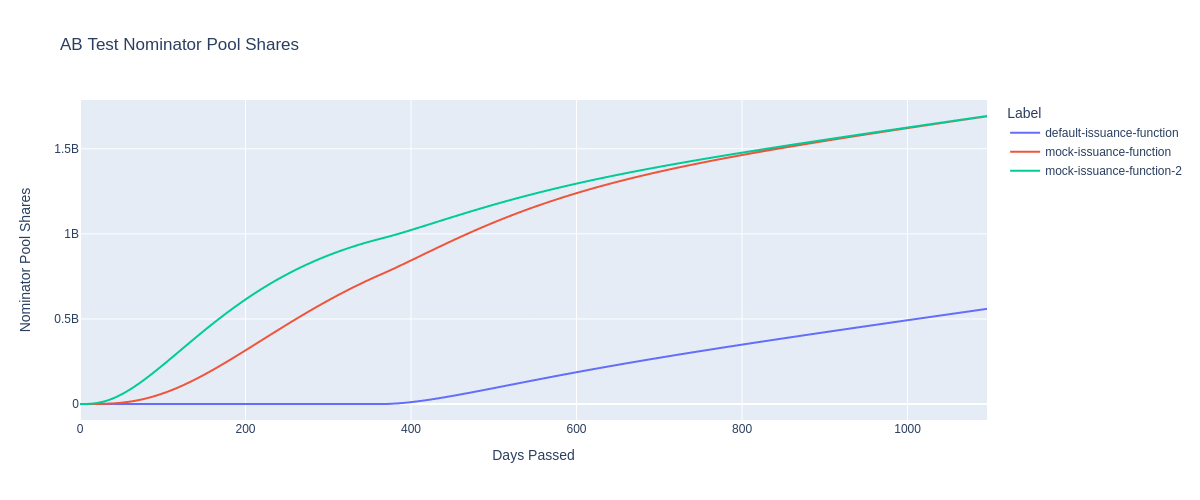

In [11]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="nominator_pool_shares",
    title="AB Test Nominator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "nominator_pool_shares": "Nominator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

In [12]:
from subspace_model.experiments.metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()


2024-01-30 16:36:52 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


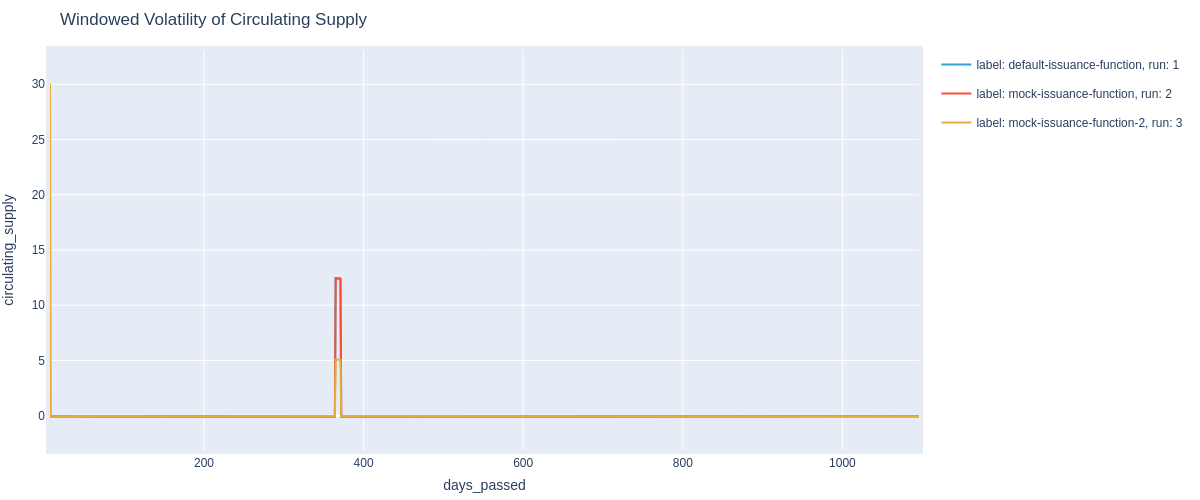

In [13]:
chart = df.hvplot.line(x='days_passed', y='circulating_supply', by=['label', 'run'], title='Windowed Volatility of Circulating Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))